# Week 11 - Review and Beyond MLP

### Aims

By the end of this notebook you will be able to understand 

>* The Basics of Keras overview
>* Linear Regression by Keras
>* Working out on Project II data

The exercises here are designed to reinforce the basics of keras for further use. Additionally, you will see some simple tasks to try and comment out. 

- For the last time, you will have lighter tasks tagged by (CORE) and (EXTRA).

- If you already submitted at least 5 hands-in script before (marked as 1), you can directly start your project II during the WS. 

- Some experiments asked below is related to the hotel data already. 

# Imports

We're only going to need a couple of standard libraries this week, as well as keras. 

In [1]:
# Display plots inline
%matplotlib inline  

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import tensorflow as tf
from tensorflow import keras

2023-04-03 17:57:22.079223: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 17:57:22.528109: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-03 17:57:22.528145: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-03 17:57:22.583511: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-03 17:57:24.244973: W tensorflow/stream_executor/platform/de

In [3]:
# Not necessary in general !
import os, datetime
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

%load_ext tensorboard
%tensorboard --port=5036 --logdir $logdir
tensorboard_callback = keras.callbacks.TensorBoard(logdir, histogram_freq=1) 

# Basics

**Just to highlight some differences**

TensorFlow is an infrastructure layer for differentiable programming. At its heart, it's a framework for manipulating N-dimensional arrays (tensors), much like NumPy.But as you experienced already, there are three key differences between NumPy and TensorFlow:

- TensorFlow can leverage hardware accelerators such as GPUs and TPUs.

- TensorFlow can automatically compute the gradient of arbitrary differentiable tensor expressions.

- TensorFlow computation can be distributed to large numbers of devices on a single machine, and large number of machines (potentially with multiple devices each).

In [4]:
x = tf.constant([[5, 2], [1, 3]])
print(x)

tf.Tensor(
[[5 2]
 [1 3]], shape=(2, 2), dtype=int32)


2023-04-03 17:57:49.507482: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-03 17:57:49.507535: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-03 17:57:49.507562: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (noteable): /proc/driver/nvidia/version does not exist
2023-04-03 17:57:49.510694: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# You can get its value as a NumPy array by calling .numpy():
x.numpy()

array([[5, 2],
       [1, 3]], dtype=int32)

In [6]:
# Much like a NumPy array, it features the attributes dtype and shape:
print("dtype:", x.dtype)
print("shape:", x.shape)

dtype: <dtype: 'int32'>
shape: (2, 2)


In [7]:
# You can also create random constant tensors:
x = tf.random.normal(shape=(2, 2), mean=0.0, stddev=1.0)
x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 3.0926309,  1.0278603],
       [-1.1365403,  0.7284249]], dtype=float32)>

## Variables

Variables are special tensors used to store mutable state (such as the weights of a neural network). You create a Variable using some initial value:

**Doing math in TensorFlow:** 

If you've used NumPy, doing math in TensorFlow will look very familiar. The main difference is that your TensorFlow code can run on GPU and TPU.

In [8]:
initial_value = tf.random.normal(shape=(2, 2))
a = tf.Variable(initial_value)
print(a)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.7980986 ,  0.15745784],
       [-0.6098922 , -2.0456643 ]], dtype=float32)>


In [9]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

c = a + b
d = tf.square(c)
e = tf.exp(d)
print(c, d, e)

tf.Tensor(
[[-1.8071861  1.251079 ]
 [-2.850041   1.2538288]], shape=(2, 2), dtype=float32) tf.Tensor(
[[3.2659216 1.5651985]
 [8.122733  1.5720866]], shape=(2, 2), dtype=float32) tf.Tensor(
[[  26.20425      4.7836246]
 [3370.2195       4.816688 ]], shape=(2, 2), dtype=float32)


# Exercise 1 (CORE)

You can convert a the dataframe column to a tensor object like so: `tf.constant((df['column_name']))`

So, consider your hotel data set as data frame;

- Convert the numerical variables `lead_time` and `adr` into tensor object

- Print the shape and type of created tensor objects

In [10]:
# Loading the data set
df_hotel = pd.read_csv("hotel.csv")

df_hotel.head()

,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,Resort Hotel,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0
1,0,Resort Hotel,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0
2,0,Resort Hotel,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0
3,0,Resort Hotel,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0
4,0,Resort Hotel,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1


In [11]:
X = df_hotel['lead_time']
y = df_hotel['adr']


# Checking the missing values
print(X.isnull().sum())
print(y.isnull().sum())

0
0


In [12]:
# For the conversion
X = tf.constant((X))
y = tf.constant((y))

print(X)
print(y)

# For the details on the created tensors
# Much like a NumPy array, it features the attributes dtype and shape:
print("dtype:", X.dtype, y.dtype)
print("shape:", y.shape, y.shape)

tf.Tensor([342 737   7 ...  34 109 205], shape=(119390,), dtype=int64)
tf.Tensor([  0.     0.    75.   ... 157.71 104.4  151.2 ], shape=(119390,), dtype=float64)
dtype: <dtype: 'int64'> <dtype: 'float64'>
shape: (119390,) (119390,)


# Keras layers

You already experienced by directly applying some layers in Week 9-10 but let us recall once again some properties

- While TensorFlow is an infrastructure layer for differentiable programming, dealing with tensors, variables, and gradients, Keras is a user interface for deep learning, dealing with layers, models, optimizers, loss functions, metrics, and more.

- Keras serves as the high-level API for TensorFlow: Keras is what makes TensorFlow simple and productive.

- The Layer class is the fundamental abstraction in Keras. A Layer encapsulates a state (weights) and some computation (defined in the call method).

A simple layer looks like this:

In [17]:
class Linear(keras.layers.Layer):
    """y = w.x + b"""

    def __init__(self, units=32, input_dim=32):
        super().__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(input_dim, units), dtype="float32"),
            trainable=True,
        )
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(
            initial_value=b_init(shape=(units,), dtype="float32"), trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [18]:
# You would use a Layer instance much like a Python function:
linear_layer = Linear(units=4, input_dim=2)
linear_layer

In [19]:
# The layer can be treated as a function.
# Here we call it on some data.
t = linear_layer(tf.ones((2, 2)))
t

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[-0.00755919, -0.07351511,  0.0961083 , -0.05432985],
       [-0.00755919, -0.07351511,  0.0961083 , -0.05432985]],
      dtype=float32)>

# Exercise 2 (CORE)

Consider the class definition given above for the `Linear` one 

- Explain the each line of code to demistfy the meaning of this class, `Linear`

- Discuss the meaning of `Linear(units=4, input_dim=2)` usage above. 

Basically, that function creates a linear class of layers bu calling `__init__` and `call` functions inside of this. If we look at the components of it closely 

- It is a densely-connected layer having the state: the variables w and b. The goal is creating a linear combination of x.

- `tf.random_normal_initializer()` stands for the Initializer that generates tensors with a normal distribution having mean=0.0, stddev=0.05 values by default

- Creation of `self.w` variable via the `tf.Variable` class, with `trainable=True` where GradientTapes automatically watch uses of this variable

- `tf.zeros_initializer()` stands for the Initializer that generates tensors initialized to 0 for the intercept term

- Creation of `self.b` variable via the `tf.Variable` class and initialized value, with `trainable=True`

- Within the call function, `tf.matmul()` allows the Multiplication of matrix a by matrix b, producing a * b (in this case multiplies w.x) for the linear definition

When we look at the line `Linear(units=4, input_dim=2)` that creates a linear  layer having the shape (4,2) and ready to use by calling it on some tensor input(s), much like a Python function.

# Exercise 3 (CORE)

For your created tensors above, 

- Build a linear regression model in keras. The model should consist of an input layer and a fully-connected output layer. See lecture notes for details of how to create these objects, previous WS materials or ask your tutors.

- Compile the model. At this stage you need to select a loss function (specified via the "loss" keyword) and an optimizer. 

- Train the model with model.fit. Pass the keyword argument (similar to previous labs). Consider small number of `epochs` like 50 for the computational time reasons 

```
# callbacks=[tensorboard_callback]
```

- You might also want to split the dataset into a training and validation component via  


```
# validation_split=0.3
```



In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
input_layer = keras.layers.Input(shape=(1,))
linear_layer = keras.layers.Dense(1, activation='linear')

output = linear_layer(input_layer)
model_lr = keras.models.Model(input_layer, output)
model_lr.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_lr.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
model_lr.fit(x=X, y=y, epochs = 50, callbacks=[tensorboard_callback], 
             shuffle=True, validation_split=0.3)

Epoch 1/50
2612/2612 [==============================] - 4s 2ms/step - loss: 7796.7383 - val_loss: 8611.3018
Epoch 2/50
2612/2612 [==============================] - 4s 2ms/step - loss: 7552.1411 - val_loss: 8298.6992
Epoch 3/50
2612/2612 [==============================] - 4s 2ms/step - loss: 7313.2012 - val_loss: 8034.9360
Epoch 4/50
2612/2612 [==============================] - 4s 2ms/step - loss: 7080.9868 - val_loss: 7686.1934
Epoch 5/50
2612/2612 [==============================] - 4s 2ms/step - loss: 6855.9727 - val_loss: 7511.8638
Epoch 6/50
2612/2612 [==============================] - 4s 2ms/step - loss: 6637.5112 - val_loss: 7208.0542
Epoch 7/50
2612/2612 [==============================] - 4s 2ms/step - loss: 6424.9170 - val_loss: 6961.9761
Epoch 8/50
2612/2612 [==============================] - 4s 2ms/step - loss: 6219.8628 - val_loss: 6680.5762
Epoch 9/50
2612/2612 [==============================] - 4s 2ms/step - loss: 6020.6143 - val_loss: 6390.1504
Epoch 10/50
2612/2612 [=====

# Exercise 4 (CORE)

- Now create a new model with single feature by adding a fully-connected hidden layer with 2 neurons between your input and output above. Using the `linear` type of layers again.

- Train the new model and comment on your fitted model

In [17]:
input_layer_an1 = keras.layers.Input(shape=(1,))
hidden_layer_an1 = keras.layers.Dense(1, activation='linear')
linear_layer_an1 = keras.layers.Dense(1, activation='linear')

output_an1 = linear_layer_an1(hidden_layer_an1(input_layer_an1))
model_an1 = keras.models.Model(input_layer_an1, output_an1)
model_an1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_an1.compile(loss='mean_squared_error', optimizer='adam')

model_an1.fit(x=X, y=y, epochs = 50, callbacks=[tensorboard_callback], 
             shuffle=True, validation_split=0.3)

Epoch 1/50
2612/2612 [==============================] - 5s 2ms/step - loss: 68463.5469 - val_loss: 18012.5645
Epoch 2/50
2612/2612 [==============================] - 4s 2ms/step - loss: 13265.2295 - val_loss: 13129.0312
Epoch 3/50
2612/2612 [==============================] - 4s 2ms/step - loss: 8897.7334 - val_loss: 8184.1904
Epoch 4/50
2612/2612 [==============================] - 5s 2ms/step - loss: 7155.5430 - val_loss: 7739.2007
Epoch 5/50
2612/2612 [==============================] - 5s 2ms/step - loss: 6764.2354 - val_loss: 7177.9023
Epoch 6/50
2612/2612 [==============================] - 4s 2ms/step - loss: 6188.4790 - val_loss: 6229.8047
Epoch 7/50
2612/2612 [==============================] - 4s 2ms/step - loss: 5125.8330 - val_loss: 4299.8550
Epoch 8/50
2612/2612 [==============================] - 4s 2ms/step - loss: 3738.3362 - val_loss: 2561.5623
Epoch 9/50
2612/2612 [==============================] - 4s 2ms/step - loss: 2989.0278 - val_loss: 1903.9467
Epoch 10/50
2612/2612 [=

# Exercise 5 (CORE)

To run the single-variable linear regression using keras, we can benefit from `Sequential` model idea as well

- See the details of added normalization layer below

- Compile the created model below and try to produce the model's training progress using the stats stored in the history object:

For more details, see example given here : https://www.tensorflow.org/tutorials/keras/regression

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

# Variable selection
lead_time = np.array(df_hotel['lead_time'])

# About normalization by keras
lead_time_normalizer = layers.Normalization(input_shape=[1,], axis=None)
lead_time_normalizer.adapt(lead_time)

In [20]:
# Created model including normalization
linear_model = tf.keras.Sequential([
    lead_time_normalizer,
    layers.Dense(units=1, activation='linear')
])

linear_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [21]:
# Compile the model 
linear_model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss='mean_squared_error')

In [22]:
# Use Keras Model.fit to execute the training for 50 epochs:
# %%time
history = linear_model.fit(
    df_hotel['lead_time'], df_hotel['adr'],
    epochs = 50,
    # Calculate validation results on 30% of the training data.
    validation_split = 0.3)

Epoch 1/50
2612/2612 [==============================] - 5s 2ms/step - loss: 12163.0410 - val_loss: 13587.5117
Epoch 2/50
2612/2612 [==============================] - 4s 2ms/step - loss: 11671.9609 - val_loss: 13045.4795
Epoch 3/50
2612/2612 [==============================] - 4s 2ms/step - loss: 11195.7793 - val_loss: 12512.1982
Epoch 4/50
2612/2612 [==============================] - 4s 2ms/step - loss: 10734.0684 - val_loss: 11991.1035
Epoch 5/50
2612/2612 [==============================] - 4s 2ms/step - loss: 10285.9238 - val_loss: 11479.7686
Epoch 6/50
2612/2612 [==============================] - 4s 2ms/step - loss: 9851.6719 - val_loss: 10981.2031
Epoch 7/50
2612/2612 [==============================] - 4s 2ms/step - loss: 9431.3389 - val_loss: 10493.5498
Epoch 8/50
2612/2612 [==============================] - 4s 2ms/step - loss: 9024.3730 - val_loss: 10018.2656
Epoch 9/50
2612/2612 [==============================] - 4s 2ms/step - loss: 8630.6094 - val_loss: 9555.3535
Epoch 10/50
261

In [23]:
# Visualize the model's training progress using the stats stored in the history object:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
45,2883.956543,1830.670776,45
46,2883.558350,1824.805908,46
47,2883.322754,1820.380859,47
48,2883.194824,1817.391235,48
49,2883.115967,1814.771362,49


In [24]:
# Plotting the behaviour of training and validation loss functions
# Consider the below function simply 

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

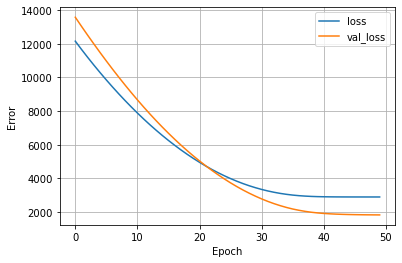

In [25]:
plot_loss(history)

# Exercise 6 (CORE)

Consider your hotel data once again. Officially, our response is binary and supposed to be the `is_canceled` in the data set. So, we are interested in predicting a binary response here so the problem is classification. 

- Consider fitting a logistic regression model in keras similar to Exercise 3. The model should consist of an input layer and a fully-connected output layer. Choose one single numerical predictor, such as `lead_time` to do this experiment

- Which activation function you used and how is the progress of the model fit with `epochs = 50` and `validation_split=0.3` (You can benefit from the plotting introduced before)

In [26]:
# Define the response with a single predictor
X = df_hotel['lead_time']
y = df_hotel['is_canceled']

In [27]:
input_layer = keras.layers.Input(shape=(1,))
logit_layer = keras.layers.Dense(1, activation='sigmoid')

output = logit_layer(input_layer)
model_lr = keras.models.Model(input_layer, output)
model_lr.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [28]:
model_lr.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
history = model_lr.fit(x = X, y = y, epochs = 50, 
                       callbacks = [tensorboard_callback], shuffle = True, validation_split = 0.3)

Epoch 1/50
2612/2612 [==============================] - 5s 2ms/step - loss: 1.8561 - val_loss: 0.8174
Epoch 2/50
2612/2612 [==============================] - 5s 2ms/step - loss: 0.6400 - val_loss: 0.6390
Epoch 3/50
2612/2612 [==============================] - 4s 2ms/step - loss: 0.6402 - val_loss: 0.8977
Epoch 4/50
2612/2612 [==============================] - 4s 2ms/step - loss: 0.6404 - val_loss: 0.6469
Epoch 5/50
2612/2612 [==============================] - 4s 2ms/step - loss: 0.6407 - val_loss: 0.8120
Epoch 6/50
2612/2612 [==============================] - 5s 2ms/step - loss: 0.6406 - val_loss: 0.8106
Epoch 7/50
2612/2612 [==============================] - 5s 2ms/step - loss: 0.6405 - val_loss: 0.8117
Epoch 8/50
2612/2612 [==============================] - 4s 2ms/step - loss: 0.6404 - val_loss: 0.7642
Epoch 9/50
2612/2612 [==============================] - 5s 2ms/step - loss: 0.6401 - val_loss: 0.7518
Epoch 10/50
2612/2612 [==============================] - 5s 2ms/step - loss: 0.640

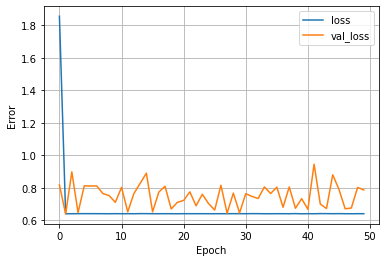

In [30]:
# Visualize the model's training progress using the stats stored in the history object:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plot_loss(history)

In [31]:
# About Predictions
y_pred = model_lr.predict(X).flatten()
y_pred

3731/3731 [==============================] - 3s 908us/step


array([0.8873185 , 0.99416655, 0.36726087, ..., 0.4173117 , 0.562171  ,
       0.730515  ], dtype=float32)

# Exercise 7 (CORE)

- Calculate your model predictions on the original data set (using the 0.5 threshold for the decision boundary)

- Compare your findings with your ground truth (true observations for `is_canceled` variable)

In [32]:
# Class labels
y_pred_lab = np.zeros((y.shape[0], 1))
y_pred_lab.shape

(119390, 1)

In [33]:
y_pred_lab = y_pred

y_pred_lab[y_pred_lab > 0.5] = 1
y_pred_lab[y_pred_lab <= 0.5] = 0
print(y_pred_lab)

[1. 1. 0. ... 0. 1. 1.]


In [34]:
# To compare with the true observations
from sklearn.metrics import confusion_matrix

#using the confusion matrix, but not strictly necessary for this task
confmat = confusion_matrix(y_true = y, y_pred = y_pred_lab)
confmat

array([[46674, 28492],
       [16260, 27964]])

# Exercise 8 (EXTRA)

For the hotel data set, as an extension of above mentioned method;

1. Lets create our feature matrix (including some variables) and response varible (`is_canceled`). You can think of set of predictors (suitable and ready to use predictors)

2.  Split the data into training and test sets as usual. Use the test size as $30\%$ of the whole sample herein.

3. Re-create the above logistic model (the model should consist of an input layer and a fully-connected output layer) and train the model using only training data now (Remember that validation over the training set still makes sense!)

4. Derive the predictions of the fitted model over the test data (unseen data set by the NN model)

**WARNING :** Note that, these steps are followed under the assumption that all the necessary data cleaning was completed generally.  

In [36]:
# For the simplicity look at two variables to illustrate 

# Define the response with a single predictor
X = df_hotel[['lead_time', 'adr']]
y = df_hotel['is_canceled']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    test_size = 0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((83573, 2), (35817, 2), (83573,), (35817,))

In [43]:
input_layer = keras.layers.Input(shape=(2,))
logit_layer = keras.layers.Dense(1, activation='sigmoid')

output = logit_layer(input_layer)
model_lr = keras.models.Model(input_layer, output)
model_lr.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [44]:
model_lr.compile(loss='binary_crossentropy', optimizer='adam')

In [45]:
history = model_lr.fit(x = X_train, y = y_train, epochs = 50, 
                       callbacks = [tensorboard_callback], shuffle = True, validation_split = 0.3)

Epoch 1/50
1829/1829 [==============================] - 3s 2ms/step - loss: 10.6556 - val_loss: 0.6351
Epoch 2/50
1829/1829 [==============================] - 3s 2ms/step - loss: 0.6306 - val_loss: 0.6298
Epoch 3/50
1829/1829 [==============================] - 3s 1ms/step - loss: 0.6235 - val_loss: 0.6166
Epoch 4/50
1829/1829 [==============================] - 3s 2ms/step - loss: 0.6200 - val_loss: 0.6133
Epoch 5/50
1829/1829 [==============================] - 3s 2ms/step - loss: 0.6192 - val_loss: 0.6140
Epoch 6/50
1829/1829 [==============================] - 3s 2ms/step - loss: 0.6199 - val_loss: 0.6133
Epoch 7/50
1829/1829 [==============================] - 3s 2ms/step - loss: 0.6200 - val_loss: 0.6166
Epoch 8/50
1829/1829 [==============================] - 3s 2ms/step - loss: 0.6185 - val_loss: 0.6141
Epoch 9/50
1829/1829 [==============================] - 3s 1ms/step - loss: 0.6189 - val_loss: 0.6163
Epoch 10/50
1829/1829 [==============================] - 3s 2ms/step - loss: 0.61

In [46]:
# About Predictions
y_pred_test = model_lr.predict(X_test).flatten()
y_pred_test


1120/1120 [==============================] - 1s 833us/step


array([0.23743105, 0.39793158, 0.6115089 , ..., 0.28781748, 0.3750703 ,
       0.21398857], dtype=float32)

In [47]:
# Class labels
y_pred_lab = np.zeros((y_test.shape[0], 1))
y_pred_lab.shape

y_pred_lab = y_pred_test

y_pred_lab[y_pred_lab > 0.5] = 1
y_pred_lab[y_pred_lab <= 0.5] = 0
print(y_pred_lab)

[0. 0. 1. ... 0. 0. 0.]


In [48]:
# To compare with the true observations
from sklearn.metrics import confusion_matrix

#using the confusion matrix, but not strictly necessary for this task
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred_lab)
confmat

array([[20974,  1576],
       [10543,  2724]])

# Exercise 9 (EXTRA)

By changing the NN model a bit further;

1. Create a new model by adding a fully-connected hidden layer with 2 neurons between your input and output above.

2. Play around the considered activation functions (adding `relu` etc. instead of logistic)

3. Train the new model over the training data and consider your predictions over the test data again. Compare your predictions with the true test values

4. Visualize the model's training progress similar to the previous graphical outputs


In [49]:
# Just for an illustration 

input_layer_an2 = keras.layers.Input(shape=(2,))
hidden_layer_an2 = keras.layers.Dense(1, activation='relu')
logit_layer_an2 = keras.layers.Dense(1, activation='relu')

output_an2 = logit_layer_an2(hidden_layer_an2(input_layer_an2))
model_an2 = keras.models.Model(input_layer_an2, output_an2)
model_an2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [50]:
model_an2.compile(loss='binary_crossentropy', optimizer='adam')

history = model_an2.fit(x = X_train, y = y_train, epochs = 50, 
                       callbacks = [tensorboard_callback], shuffle = True, validation_split = 0.3)

Epoch 1/50
1829/1829 [==============================] - 3s 2ms/step - loss: 4.9958 - val_loss: 4.3535
Epoch 2/50
1829/1829 [==============================] - 3s 2ms/step - loss: 4.0974 - val_loss: 3.7188
Epoch 3/50
1829/1829 [==============================] - 3s 2ms/step - loss: 3.5661 - val_loss: 3.3350
Epoch 4/50
1829/1829 [==============================] - 3s 2ms/step - loss: 2.9258 - val_loss: 2.7894
Epoch 5/50
1829/1829 [==============================] - 3s 2ms/step - loss: 2.8486 - val_loss: 2.7608
Epoch 6/50
1829/1829 [==============================] - 3s 2ms/step - loss: 2.8194 - val_loss: 2.7295
Epoch 7/50
1829/1829 [==============================] - 3s 2ms/step - loss: 2.7713 - val_loss: 2.6109
Epoch 8/50
1829/1829 [==============================] - 3s 2ms/step - loss: 2.5838 - val_loss: 2.3755
Epoch 9/50
1829/1829 [==============================] - 3s 2ms/step - loss: 2.2402 - val_loss: 1.8506
Epoch 10/50
1829/1829 [==============================] - 3s 2ms/step - loss: 1.767

In [51]:
# About Predictions
y_pred_test = model_lr.predict(X_test).flatten()
y_pred_test


# Class labels
y_pred_lab = np.zeros((y_test.shape[0], 1))
y_pred_lab.shape

y_pred_lab = y_pred_test

y_pred_lab[y_pred_lab > 0.5] = 1
y_pred_lab[y_pred_lab <= 0.5] = 0
print(y_pred_lab)

1120/1120 [==============================] - 1s 826us/step
[0. 0. 1. ... 0. 0. 0.]


In [52]:
# To compare with the true observations
from sklearn.metrics import confusion_matrix

#using the confusion matrix, but not strictly necessary for this task
confmat = confusion_matrix(y_true = y_test, y_pred = y_pred_lab)
confmat

array([[20974,  1576],
       [10543,  2724]])

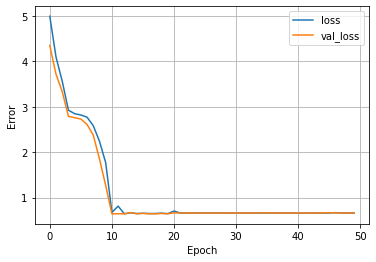

In [53]:
# Visualize the model's training progress using the stats stored in the history object:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plot_loss(history)